<a href="https://colab.research.google.com/github/adeeba-im/disease-pred/blob/main/Disease_prediction_dev_town.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"adeebaimtiyaz","key":"e53469ae4af2ffda1fdc2795f70d8dc5"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 39.1MB/s]


In [5]:
import pandas as pd
df=pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [8]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [9]:
numeric_cols =df.select_dtypes(include='number').columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())


In [11]:
import matplotlib.pyplot as plt#simple visualization(graphs)
import seaborn as sns  #advanced visualization (heatmaps)

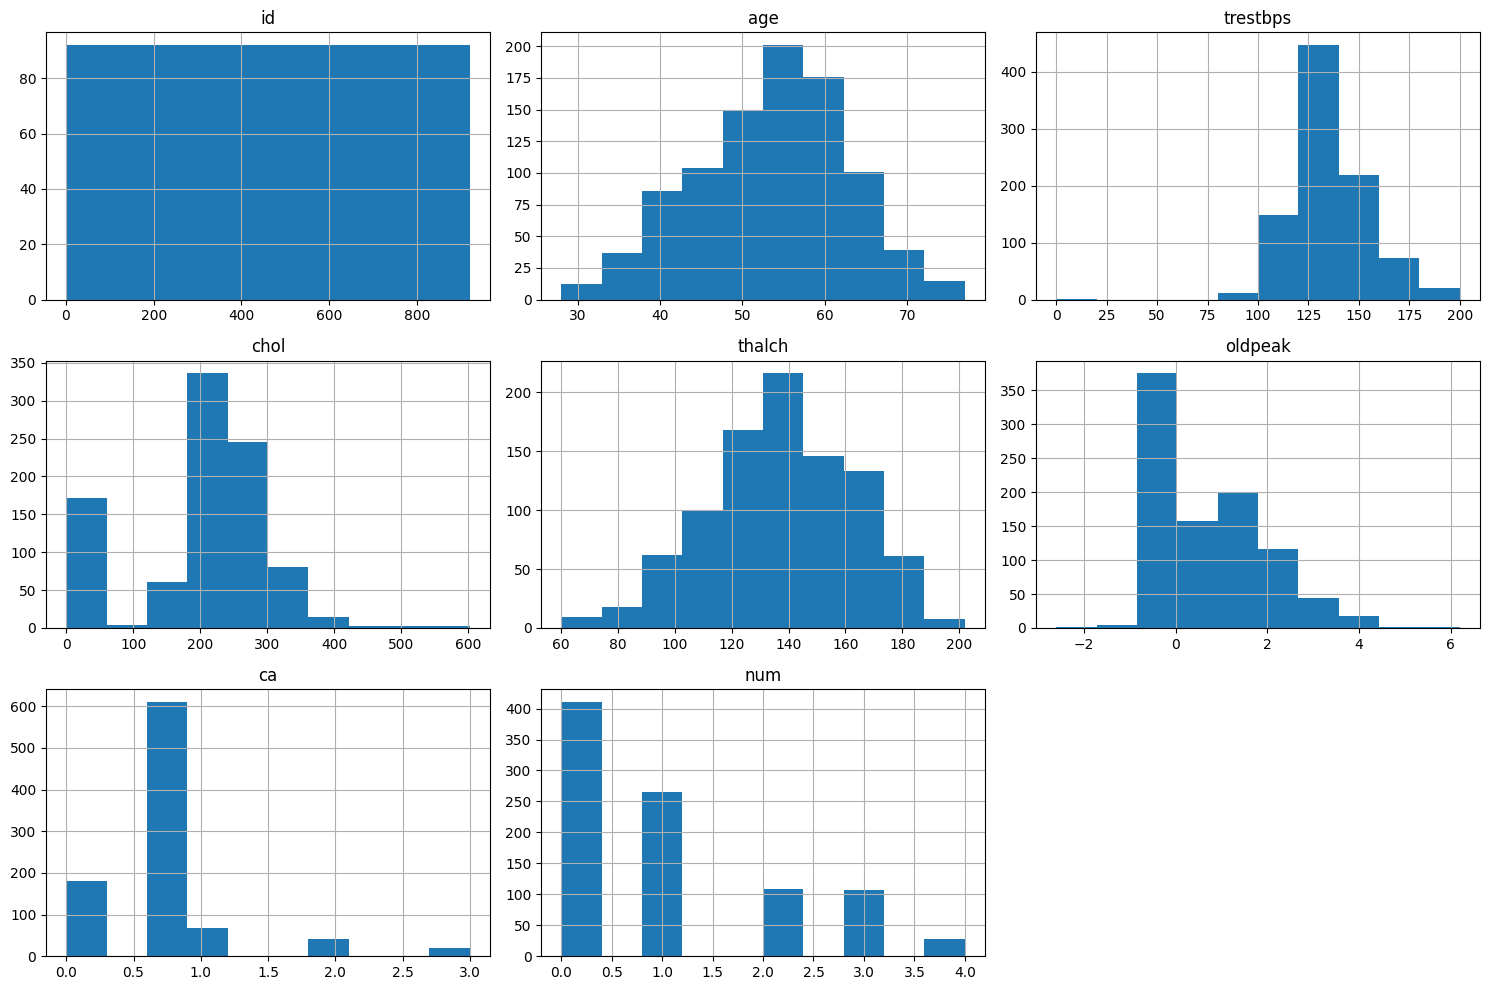

In [12]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

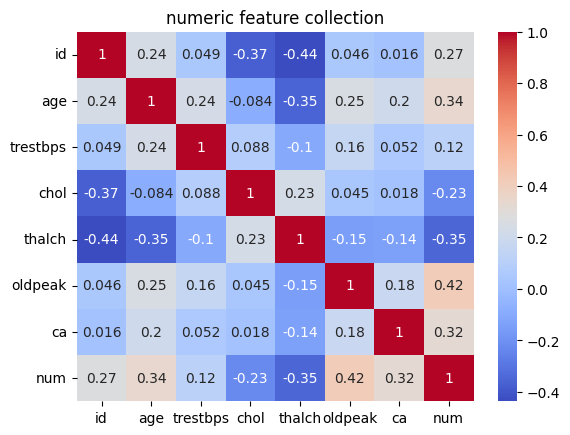

In [13]:
  sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title('numeric feature collection')
plt.show()

In [14]:
cat_cols=df.select_dtypes(include="object").columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove ('num')

In [15]:
x=df.drop('num',axis=1)
y=(df['num']>0).astype(int)

In [16]:
x=pd.get_dummies(x,columns=cat_cols)
print("final feature columns:",x.columns)

final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2 , random_state=42)

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr_model=LogisticRegression()
lr_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [23]:
from sklearn.metrics import accuracy_score,classification_report

In [24]:
y_pred_lr=lr_model.predict(x_test_scaler)
print("accuracy",accuracy_score,y_pred_lr)
print (classification_report(y_test,y_pred_lr))

accuracy <function accuracy_score at 0x7ab5fc11b060> [0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0
 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0
 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 

In [25]:
from sklearn.metrics import confusion_matrix

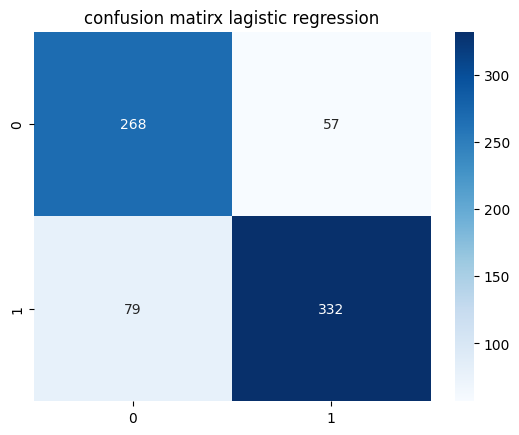

In [26]:
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('confusion matirx lagistic regression')
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train_scaled,y_train)
y_pred_lr = rf_model.predict(x_test_scaler)
print("random forest accuaracy", accuracy_score(y_test,y_pred_lr))

random forest accuaracy 0.8627717391304348


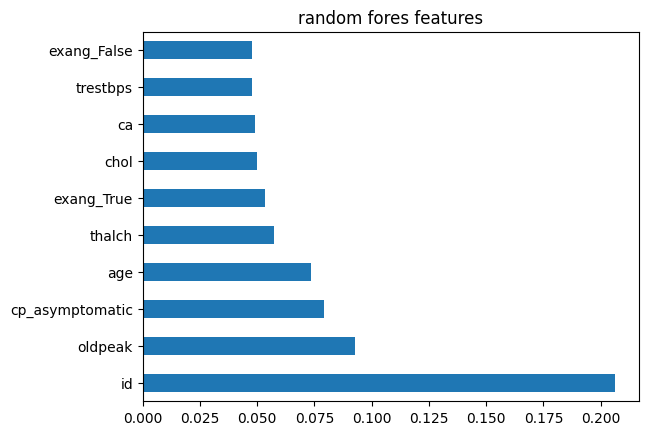

In [29]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('random fores features')
plt.show()

In [30]:
import joblib
joblib.dump (rf_model,'heart_rf_model.pkl')
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [31]:
sample = x.head(1)
sample.to_csv('heart_user-teplate.csv',index=False )
print("user template saved as'heart_user-teplate.csv'")

user template saved as'heart_user-teplate.csv'


In [36]:
from google.colab import files
files.upload()

Saving heart_user-teplate (1).csv to heart_user-teplate (1) (1).csv


{'heart_user-teplate (1) (1).csv': b'id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect\n1,63,145.0,233.0,150.0,2.3,0.0,False,True,True,False,False,False,False,False,False,True,False,True,True,False,False,True,False,True,False,False,True,False,False\n'}

In [45]:
import joblib
import pandas as pd

user_df = pd.read_csv('heart_user-teplate.csv')

numeric_cols=df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

numeric_cols=[col for col in numeric_cols if col in user_df.columns]
cat_cols=[col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

user_df[numeric_cols]=user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col]=user_df[col].astype(int)

user_df_encoded=pd.get_dummies(user_df,columns=cat_cols)

user_df_encoded =  user_df_encoded.reindex(columns=x.columns,fill_value=0)

scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

model = joblib.load('heart_rf_model.pkl')
preds=model.predict(user_df_scaled)
user_df['heart_disease_prediction']=preds

print(user_df)



   id  age  trestbps   chol  thalch  oldpeak   ca  sex_Female  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3  0.0       False      True   

   dataset_Cleveland  ...  restecg_st-t abnormality  exang_False  exang_True  \
0               True  ...                     False         True       False   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0               True       False            False               True   

   thal_normal  thal_reversable defect  heart_disease_prediction  
0        False                   False                         0  

[1 rows x 31 columns]
